# DOCUMENTS ANALISYS IN THE EDMS - GEPOL

## 1-Import libraries (APIs for processing data)

In [1]:
# si se va usar en un cuaderno web, es bueno instalar la librería Tensorflow en la maquina virtual.
#!pip install tensorflow

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats as ss
from scipy.stats import gaussian_kde
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

c:\Users\wagne\AppData\Local\Programs\Python\Python310\lib\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn(


## 2-Read data with pandas library (Data Wrangling)

### Read file with pandas library

In [3]:
data = pd.read_json('C:/Users/wagne/Downloads/PREDICCION-DOCUMENTAL-GEPOL/data/produccion documental GEPOL.json')
data

,Mes,Dia,Cantidad,NoMes
0,ENERO,31,384,1
1,ENERO,19,351,1
2,ENERO,4,410,1
3,ENERO,26,415,1
4,ENERO,10,273,1
...,...,...,...,...
209,JULIO,29,450,7
210,JULIO,30,193,7
211,JULIO,31,465,7
212,AGOSTO,1,420,8


### Sort data - (for month number column (NoMes))

In [4]:
order_by_month = data.sort_values('NoMes')
order_by_month.head(10)

,Mes,Dia,Cantidad,NoMes
0,ENERO,31,384,1
29,ENERO,2,329,1
30,ENERO,5,270,1
31,ENERO,12,291,1
52,ENERO,23,366,1
53,ENERO,30,336,1
54,ENERO,22,250,1
55,ENERO,3,323,1
56,ENERO,13,275,1
161,ENERO,16,389,1


## 3-Data Visualization

### BarChart - (Documents consolidate 2023 year)

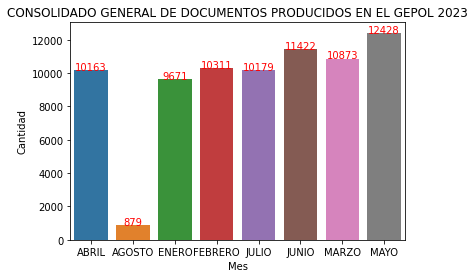

In [5]:
groupedvalues = data.groupby('Mes').sum().reset_index()
g = sns.barplot(x = 'Mes', y = 'Cantidad', data = groupedvalues)
for index, row in groupedvalues.iterrows():
    g.text(row.name, row.Cantidad - 2, round(row.Cantidad, 2), color = 'red', ha = "center")

plt.title('CONSOLIDADO GENERAL DE DOCUMENTOS PRODUCIDOS EN EL GEPOL 2023')
plt.savefig('C:/Users/wagne/Downloads/PREDICCION-DOCUMENTAL-GEPOL/reports/GEPOL1S.jpg')

### Pairplot chart -(Produced documents for GEPOL)

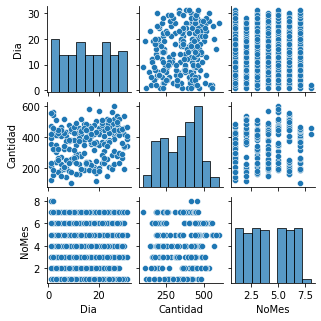

In [6]:
sns.pairplot(data,height=1.5)

### Violin chart -(Produced documents for GEPOL)

Text(0.5, 1.0, 'CANTIDAD DE DOCUMENTOS PRODUCIDOS EN EL GEPOL MES 01 Y 02 - 2023')

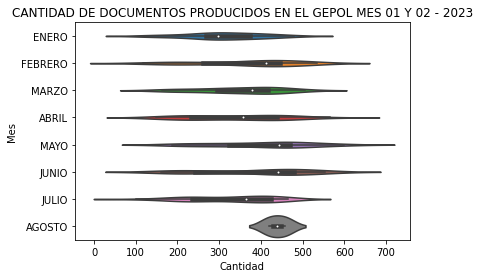

In [7]:
sns.violinplot(data=data, x="Cantidad", y="Mes")
plt.title('CANTIDAD DE DOCUMENTOS PRODUCIDOS EN EL GEPOL MES 01 Y 02 - 2023')

### Catplot chart -(Produced documents for GEPOL)

Text(0.5, 1.0, 'CANTIDAD DE DOCUMENTOS PRODUCIDOS EN EL GEPOL')

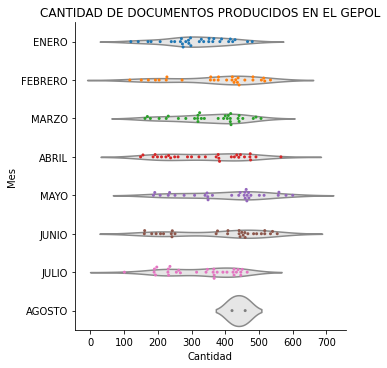

In [8]:
sns.catplot(data=data, x="Cantidad", y="Mes", kind="violin", color=".9", inner=None)
sns.swarmplot(data=data, x="Cantidad", y="Mes", size=3)
plt.title('CANTIDAD DE DOCUMENTOS PRODUCIDOS EN EL GEPOL')

### Scatterplot chart -(Produced documents for GEPOL)

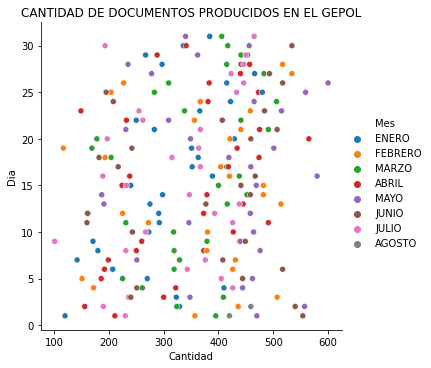

In [9]:
sns.relplot(data=data, x="Cantidad", y="Dia", hue="Mes")
plt.title('CANTIDAD DE DOCUMENTOS PRODUCIDOS EN EL GEPOL')
plt.savefig('C:/Users/wagne/Downloads/PREDICCION-DOCUMENTAL-GEPOL/reports/GEPOL2S.jpg')

### Scatterplot chart ordeded - (Days transcurred month to month)

In [10]:
# Crear el scatter plot
fig = px.scatter(data_frame=data, x='Mes', y='Dia', text='Cantidad', title='CANTIDAD DE DOCUMENTOS PRODUCIDOS EN EL GEPOL - (MES A MES)')

# Cambiar nombre de los ejes
fig.update_xaxes(title_text='Mes')
fig.update_yaxes(title_text='Número de días transcurridos')

# Centrar el título
fig.update_layout(title_x=0.5)

# Mostrar la gráfica
fig.show()

### Scatterplot chart  - (Documents quanty for day)

In [11]:
# Crear el scatter plot
fig = px.scatter(data_frame=data, x='Mes', y='Cantidad', text='Dia', title='CANTIDAD DE DOCUMENTOS PRODUCIDOS POR DÍA EN EL GEPOL - AÑO 2023',
                 color_discrete_sequence=px.colors.qualitative.Prism)


# Personalizar la apariencia de la leyenda
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='SlateGrey')),
                  selector=dict(mode='markers+text'))

# Cambiar nombre de los ejes
fig.update_xaxes(title_text='Mes')
fig.update_yaxes(title_text='Cantidad de documentos producidos por dia')

# Centrar el título
fig.update_layout(title_x=0.5)

# Mostrar la gráfica
fig.show()

## 4-Descriptive statistic

### Media

In [12]:
#calculo de la media o promedio - https://blog.adrianistan.eu/estadistica-python-media-mediana-varianza-percentiles-parte-iii
#La media aritmética se define como la suma de N elementos dividida entre N. Se trata una medida bastante conocida entre la gente, aunque tiene el inconveniente de que es muy susceptible a valores extremos.
media=data["Cantidad"].mean()

print("la media es:", media)

#esto quiere decir, si ponemos de una forma equitativa

la media es: 354.7943925233645


### Median

In [13]:
#calculo de la mediana -https://blog.adrianistan.eu/estadistica-python-media-mediana-varianza-percentiles-parte-iii
#La mediana es el valor que dentro del conjunto de datos es menor que el 50% de los datos y mayor que el 50% restante.
mediana=data["Cantidad"].median()

print("La mediana es:", mediana)

La mediana es: 373.0


### Mode

In [14]:
#Calculo de la moda -
#La moda es el valor más repetido (solo aplicable a variables discretas).
moda=data["Cantidad"].mode()
print("La moda es:", moda)

La moda es: 0    441
Name: Cantidad, dtype: int64


### Quantile

In [15]:
p90 = data["Cantidad"].quantile(0.9)
print("El cuartil y percentil es: ", p90)

#El concepto es igual al de mediana, salvo que aquí la división ya no es en el 50%.
#El 25% de las observaciones es menor que el primer cuartil.
#Los cuartiles abarcan el 25%, 50% y 75% de las observaciones. Los percentiles son una generalización con cualquier porcentaje.

El cuartil y percentil es:  483.70000000000005


### Skew

In [16]:
asimetria = ss.skew(data["Cantidad"])#se calcula con el metodo skew
print("La asimetría es: ", asimetria)

#Para saber si los datos estan repartidos de forma simétrica existen varios coeficientes: Pearson, Fisher, Bowley-Yule, etc

#Para no liarnos demasiado, podemos usar la función skew de SciPy.

#Para valores cercanos a 0, la variable es simétrica. Si es positiva tiene cola a la derecha y si es negativa tiene cola a la izquierda.

#Y con esto hemos visto los datos que se pueden extraer de una sola variable.

La asimetría es:  -0.22139452329824585


### Statistic resume

In [17]:
# Realización de un resumen estadístico del DataFrame
data['Cantidad'].describe()

count    214.000000
mean     354.794393
std      114.222149
min      101.000000
25%      251.000000
50%      373.000000
75%      444.000000
max      600.000000
Name: Cantidad, dtype: float64

### DataFrame count

In [18]:
# Conteo de Indices o filas con datos en el DataFrame
data.count()

Mes         214
Dia         214
Cantidad    214
NoMes       214
dtype: int64

### Interactive asimetric chart

In [19]:
# Calcula la asimetría
skewness = data['Cantidad'].skew()

# Crea un histograma para visualizar la distribución de datos
fig = go.Figure()

fig.add_trace(go.Histogram(x=data['Cantidad'], nbinsx=30))

# Agrega una línea vertical para mostrar la media
media = data['Cantidad'].mean()
fig.add_trace(go.Scatter(x=[media, media], y=[0, max(np.histogram(data['Cantidad'], bins=30)[0])],
                         mode='lines', name='Media', line=dict(color='red', width=2)))

# Agrega texto para mostrar la asimetría en el gráfico
fig.add_annotation(x=media, y=max(np.histogram(data['Cantidad'], bins=30)[0]),
                   text=f"Asimetría: {skewness:.2f}", showarrow=True, arrowhead=2, ax=0, ay=-40)

# Configura el diseño del gráfico
fig.update_layout(title_text='ASIMETRÍA INTERACTIVA PRODUCCIÓN DE DOCUMENTOS GEPOL - AÑO 2023',
                  xaxis_title='Valor',
                  yaxis_title='Frecuencia')

# Centrar el título
fig.update_layout(title_x=0.5)

# Muestra el gráfico
fig.show()

### Asimetric chart

c:\Users\wagne\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'ASIMETRÍA ESTADISTICA DOCUMENTOS PRODUCIDOS EN EL GEPOL - AÑO 2023')

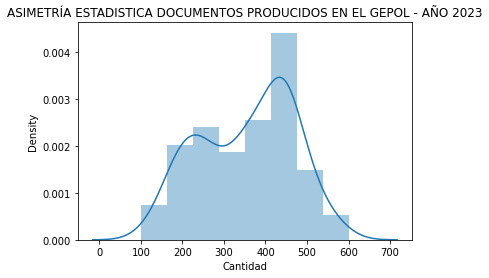

In [20]:
#Representación gráfica de la asimetría
sns.distplot(data['Cantidad']);
plt.title('ASIMETRÍA ESTADISTICA DOCUMENTOS PRODUCIDOS EN EL GEPOL - AÑO 2023')

### Asimetric chart with red line

c:\Users\wagne\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



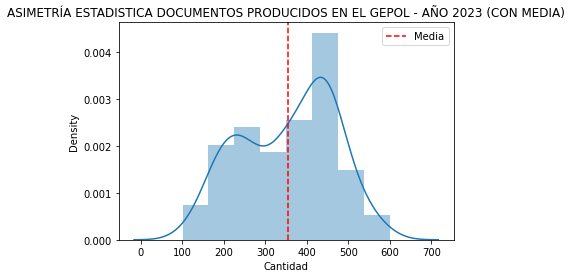

In [21]:
# Crea el gráfico de distribución utilizando sns.distplot()
sns.distplot(data['Cantidad'])

# Calcula la media de los datos
media = data['Cantidad'].mean()

# Agrega una línea vertical para mostrar la media
plt.axvline(x=media, color='red', linestyle='--', label='Media')

# Agrega una leyenda al gráfico
plt.legend()

plt.title('ASIMETRÍA ESTADISTICA DOCUMENTOS PRODUCIDOS EN EL GEPOL - AÑO 2023 (CON MEDIA)')

# Muestra el gráfico
plt.show()

## 5-Data prediction

### Create Recurrent Neural Network - (based on the data analyzed)

Taks earrings

ToDo list:

- [x] Make correction at ML algorithm in the documental prediction.

- [x] Make ranges approximates

In [22]:
# Asegurémonos de que los datos están ordenados por "NoMes" y "Dia" de manera ascendente.
data = data.sort_values(by=['NoMes', 'Dia']) # se utiliza el metodo .sort() de pandas

# Seleccionar el último mes
ultimo_mes = data['NoMes'].max()# se tomará la variable más reciente

# Filtrar los datos para obtener solo los registros del último mes
ultimo_mes_data = data[data['NoMes'] == ultimo_mes]

# Obtener el último día, último valor de "Cantidad" y convertirlos a un array de numpy
ultimo_dia = ultimo_mes_data['Dia'].values[-1]
ultima_cantidad = ultimo_mes_data['Cantidad'].values[-1]

# Escalar los datos para mejorar el rendimiento de la red neuronal
scaler = MinMaxScaler()
data['Cantidad'] = scaler.fit_transform(data['Cantidad'].values.reshape(-1, 1))

# Crear secuencias de entrada y salida para la RNN
def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        sequence = data[i:i+sequence_length]
        sequences.append(sequence)
    return np.array(sequences)

# Definir la longitud de la secuencia (cuántos días se usarán para predecir el siguiente)
sequence_length = 7

# Crear secuencias de entrada y salida para la RNN
X = create_sequences(data['Cantidad'].values, sequence_length)
y = data['Cantidad'].values[sequence_length:]

# Dividir los datos en conjuntos de entrenamiento y prueba
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Construir la red neuronal recurrente
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(sequence_length, 1)),
    tf.keras.layers.Dense(1)
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Realizar la predicción para el último día del último mes
ultimo_mes_input = np.array([ultima_cantidad])
ultimo_mes_input = scaler.transform(ultimo_mes_input.reshape(-1, 1))
ultimo_mes_input = np.tile(ultimo_mes_input, (1, sequence_length, 1))
prediccion = model.predict(ultimo_mes_input)

# Desescalar la predicción para obtener la cantidad de documentos
prediccion = scaler.inverse_transform(prediccion)[0][0]

print(f"Para el día sigiente, se tendrá una predicción en producción aproximada de {prediccion:.0f} documentos en el sistema GEPOL")

Epoch 1/100
6/6 [==============================] - 10s 37ms/step - loss: 0.2509
Epoch 2/100
6/6 [==============================] - 0s 8ms/step - loss: 0.1182
Epoch 3/100
6/6 [==============================] - 0s 10ms/step - loss: 0.0576
Epoch 4/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0650
Epoch 5/100
6/6 [==============================] - 0s 10ms/step - loss: 0.0592
Epoch 6/100
6/6 [==============================] - 0s 10ms/step - loss: 0.0546
Epoch 7/100
6/6 [==============================] - 0s 10ms/step - loss: 0.0542
Epoch 8/100
6/6 [==============================] - 0s 10ms/step - loss: 0.0529
Epoch 9/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0540
Epoch 10/100
6/6 [==============================] - 0s 10ms/step - loss: 0.0530
Epoch 11/100
6/6 [==============================] - 0s 10ms/step - loss: 0.0527
Epoch 12/100
6/6 [==============================] - 0s 10ms/step - loss: 0.0524
Epoch 13/100
6/6 [==============================] -

### Model evaluation

In [23]:
# Evaluar el modelo
train_loss = model.evaluate(X_train, y_train)
test_loss = model.evaluate(X_test, y_test)
print(f'Error de entrenamiento: {train_loss}')
print(f'Error de prueba: {test_loss}')

2/2 [==============================] - 0s 8ms/step - loss: 0.0338
Error de entrenamiento: 0.030542584136128426
Error de prueba: 0.033768609166145325


### Convert to percentage the model evaluation

In [24]:
#Convertir a porcentaje
total_prediccion=100
error= (train_loss)
porcentaje=(total_prediccion-train_loss)
print('El porcentaje de evaluación a la Red Neuronal es de:',porcentaje,'%')

El porcentaje de evaluación a la Red Neuronal es de: 99.96945741586387 %


Taks earrings

ToDo list:

- [ ] Insert audio in the .ipynb

- [ ] convert text to audio in line codes - (view ChatGPT a idea)

## 6- Bibliographic References

- ¿Qué es el sobreajuste? - Explicación del sobreajuste en machine learning - AWS. (s. f.). Amazon Web Services, Inc. https://aws.amazon.com/es/what-is/overfitting/

- ¿Qué es el subajuste? | IBM. (s. f.). https://www.ibm.com/mx-es/topics/underfitting#:~:text=el%20siguiente%20paso-,%C2%BFQu%C3%A9%20es%20el%20Subajuste%3F,en%20los%20datos%20no%20vistos.

- Bar. (s. f.). https://plotly.com/python/bar-charts/

- Comunidad Huawei Enterprise. (s. f.). ¿Qué es Epoch en Machine Learning? - Comunidad Huawei Enterprise. https://forum.huawei.com/enterprise/es/%C2%BFqu%C3%A9-es-epoch-en-machine-learning/thread/1009781-100757

- Dabbas, E. (2021). Interactive Dashboards and Data Apps with Plotly and Dash: Harness the Power of a Fully Fledged Frontend Web Framework in Python - No JavaScript Required.

- Géron, A. (2019). Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems. O’Reilly.

- IBM. (s. f.). ¿Qué son las redes neuronales recurrentes? https://www.ibm.com/es-es/topics/recurrent-neural-networks

- IBM. (s. f.). ¿Qué es el análisis exploratorio de datos? | https://www.ibm.com/mx-es/topics/exploratory-data-analysis

- McKinney, W. (2017). Python for Data Analysis: Data Wrangling with Pandas, Numpy, and Ipython. O’Reilly Media.

- Roldán, R. C., Martín, E. M., & Rodríguez, A. R. (2019). Big data con Python: recolección, almacenamiento y proceso.

- Vanderplas, J. T., & VanderPlas, J. (2016). Python Data Science Handbook: Essential Tools for Working with Data. O’Reilly Media.

- Wilke, C. O. (2019). Fundamentals of Data Visualization: A Primer on Making Informative and Compelling Figures